### **MEDICAL INSURANCE COST PREDICTION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

***data Collection & Analysis:***

In [3]:
df = pd.read_csv('12insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***Categorical Features: Sex, Smoker, Region***

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

***data Analysis:***

In [8]:
#statistical measures
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


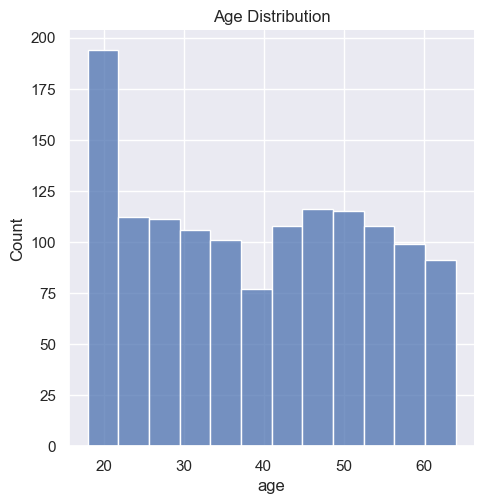

In [ ]:
#distribution of Age value:
sns.set()
plt.Figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

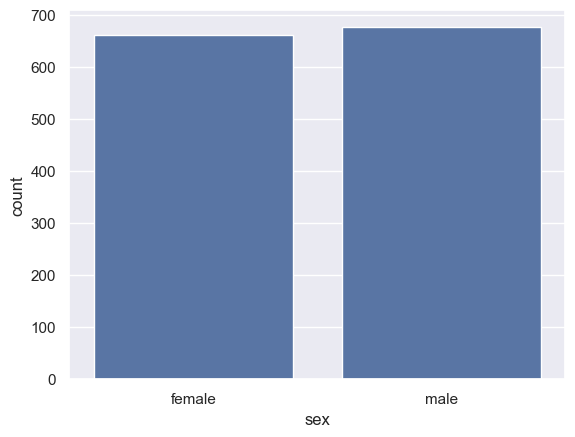

In [17]:
#Gender column:
sns.countplot(data=df, x=df['sex'])

In [18]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

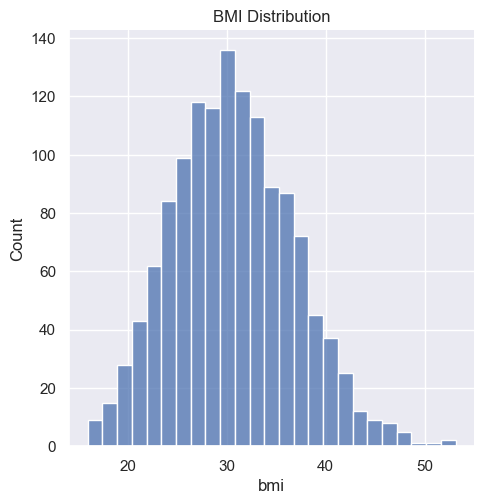

In [ ]:
#distribution of BMI:
sns.set()
plt.Figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

***Normal BMI Range --> 18.5 to 24.9***

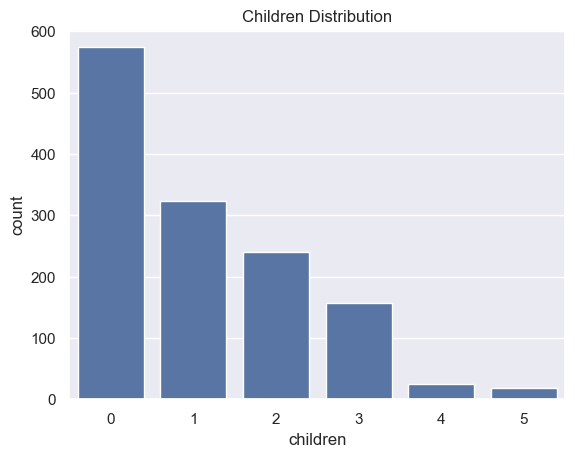

In [ ]:
#distribution of children value:
sns.set()
plt.Figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()

In [21]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

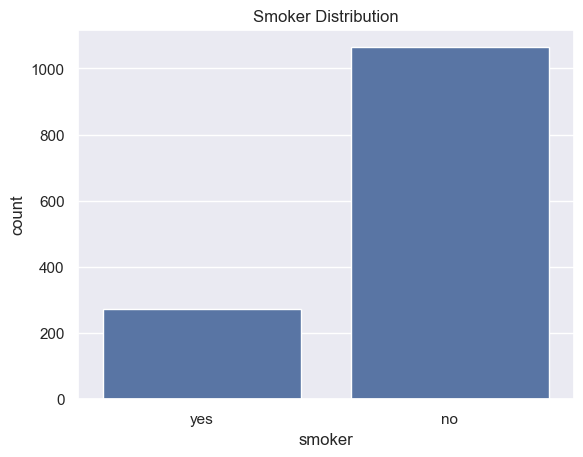

In [ ]:
#Smoker column:
plt.Figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

In [23]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

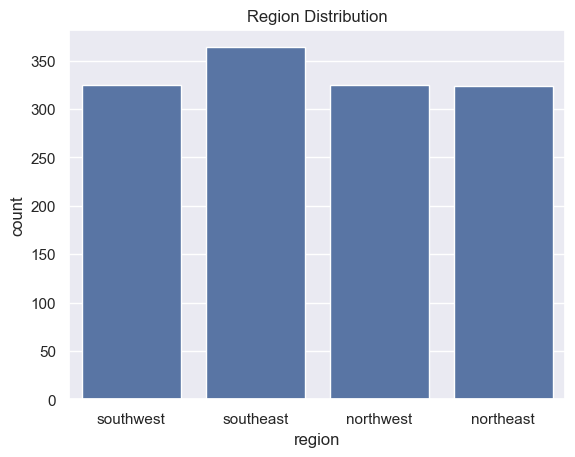

In [26]:
#Region column:
plt.Figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

In [27]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

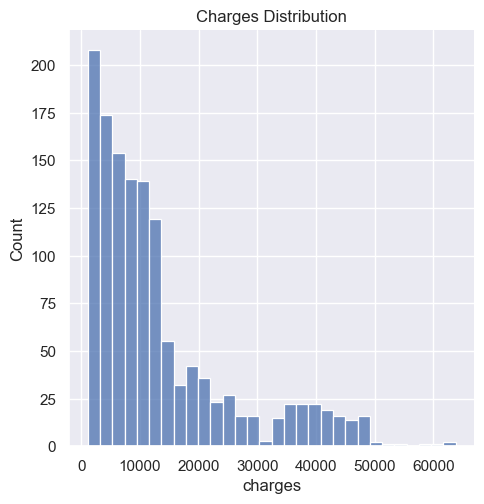

In [28]:
#distribution of charges value:
plt.Figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

***data pre-Processing:***

In [ ]:
#Encoding the categorical features:-

# Encoding 'sex' column:
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
# Encoding 'smoker' column:
df.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)  # 'yes' should be '1' and "no" should be "0"
# Encoding 'region' column:
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

C:\Users\arrma\AppData\Local\Temp\ipykernel_17228\3227361122.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\arrma\AppData\Local\Temp\ipykernel_17228\3227361122.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)  # 'yes' should be 1 and 'no' should be 0
C:\Users\arrma\AppData\Local\Temp\ipykernel_17228\3227361122.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


***splitting the Features and Target:***

In [31]:
X = df.drop(columns='charges', axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [32]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

***Splitting the data into Training & Testing data:***

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [34]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

***Model Training:***

In [35]:
regressor = LinearRegression()

In [37]:
regressor.fit(X_train, y_train)

LinearRegression()

***Model Evaluation:***

In [39]:
training_data_prediction = regressor.predict(X_train)
training_data_prediction

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [45]:
#Rsq value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('Rsq value : ', r2_train)

Rsq value :  0.751505643411174


In [43]:
testing_data_prediction = regressor.predict(X_test)
testing_data_prediction

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [46]:
#Rsq value
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('Rsq value : ', r2_test)

Rsq value :  0.7447273869684077


***building a Predictive System:***

In [47]:
input_data = (31,1,25.74,0,0,0)

#changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are for only instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshape)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960514


c:\Users\arrma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
